In [1]:
# 2015-2016 Stats

In [122]:
# --- Imports ---
import datetime as dt
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from scipy import stats
from pylab import *
from sklearn.neighbors import KernelDensity
%matplotlib inline

    

In [123]:
filename = '2015_2016_stats.csv'
df = pd.read_csv(filename, na_values=['na'])
for keys in df.keys():
    print keys


RK
PLAYER
GP
MPG
TS%
AST
TO
USG
ORR
DRR
REBR
PER
VA
EWA


In [124]:
def stats_to_display(data):
    n, min_max, mean, var, skew, kurt = stats.describe(data)
    print("Number of elements: {0:d}".format(n))
    print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
    print("Mean: {0:8.6f}".format(mean))
    print("Standard Deviation: {0:8.6f}".format(np.std(data)))
    print("Variance: {0:8.6f}".format(var))
    print("Skew : {0:8.6f}".format(skew))
    print("Kurtosis: {0:8.6f}".format(kurt))
    nmbr_std  = (min_max[1] - mean)/np.std(data)
    print("Number of Standard Deviations the Max is from mean: {0:8.6f}".format(nmbr_std))

In [125]:
n, min_max, mean, var, skew, kurt = stats.describe(df.PER)
print("Number of elements: {0:d}".format(n))
print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
print("Mean: {0:8.6f}".format(mean))
print("Standard Deviation: {0:8.6f}".format(np.std(df.PER)))
print("Variance: {0:8.6f}".format(var))
print("Skew : {0:8.6f}".format(skew))
print("Kurtosis: {0:8.6f}".format(kurt))
nmbr_std  = (min_max[1] - mean)/np.std(df.PER)
print("Number of Standard Deviations the Max is from mean: {0:8.6f}".format(nmbr_std))

Number of elements: 321
Minimum: -1.160000 Maximum: 35.470000
Mean: 14.357009
Standard Deviation: 5.110888
Variance: 26.202807
Skew : 0.557577
Kurtosis: 0.933902
Number of Standard Deviations the Max is from mean: 4.130983


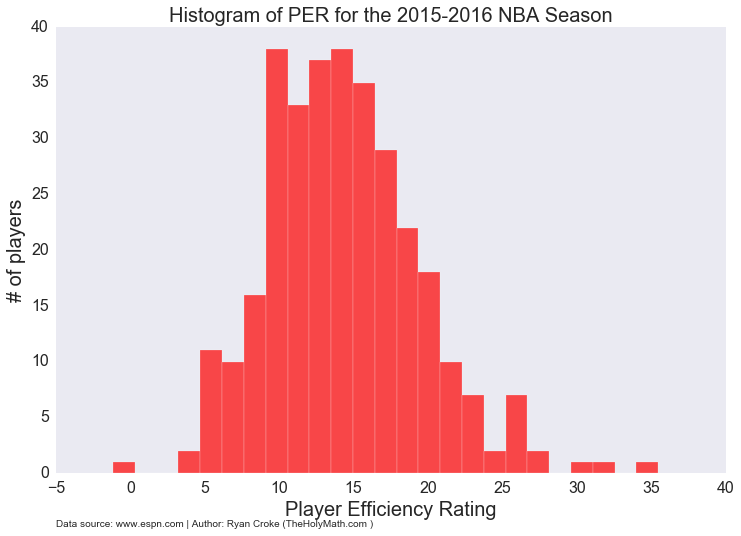

In [126]:
hist, bins = np.histogram(df.PER, bins=25)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 8), dpi=300)
plt.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')
plt.xlabel('Player Efficiency Rating',fontsize=20)
plt.ylabel('# of players',fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Histogram of PER for the 2015-2016 NBA Season',fontsize=20)
plt.text(-5,-4.8, "Data source: www.espn.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.grid(False)
plt.axis(bgcolor='white')
plt.savefig('Histogram_PER.png', bbox_inches='tight')
plt.show()

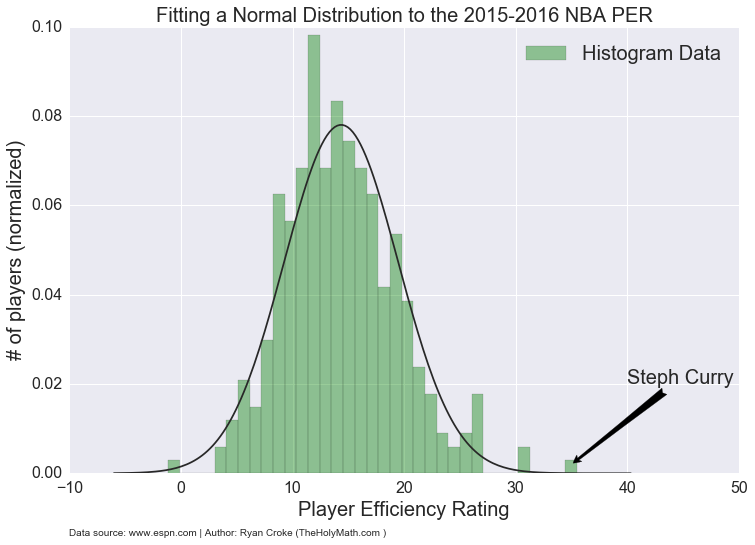

In [127]:
plt.figure(figsize=(12, 8), dpi=300)
#sns.kdeplot(df.PER, shade=True)
sns.distplot(df.PER, kde=False, fit=stats.norm,color="g",label='Histogram Data',bins=35);
plt.xlabel('PER',fontsize=20)
plt.ylabel('')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Fitting a Normal Distribution to the 2015-2016 NBA PER',fontsize=20)
plt.annotate('Steph Curry', xy=(35, 0.002), xytext=(40, 0.02),fontsize=20,
            arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
plt.text(-10,-0.014, "Data source: www.espn.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.xlabel('Player Efficiency Rating',fontsize=20)
plt.ylabel('# of players (normalized)',fontsize=20)
plt.savefig('Curry_Normal.png', bbox_inches='tight')
plt.legend(fontsize=20);

From Wikipedia: A six sigma process is one in which 99.99966% of all opportunities to produce some feature of a part are statistically expected to be free of defects (3.4 defective features per million opportunities)

In [8]:
# 4.130983 is 99.9936% within interval ... or there is a 0.006% a data point is within 4 standard deviations, but this is a two-sided
# statistic so divide by 2...that is 0.003% chance all data (pos) is inside (mean,4sigma). This is a probability of 0.00003 and
# the fraction outsided (two-side) is 1 / 15787 and so the one-sided is double that 1 / (15787*2) or 1/ 31574. This means that 
# Steph Curry's season will happen 1 time for every 31,574 statistal seasons. If there are about 350 qualified player seasons per year
# then this happens every 90 NBA seasons. And this is an underestimate. 

Rk
Team
Wins
Losses
G
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
PTS/G
Number of elements: 30
Minimum: 152.000000 Maximum: 366.000000
Mean: 242.466667
Standard Deviation: 47.477527
Variance: 2331.843678
Skew : 0.144792
Kurtosis: 0.294957
Number of Standard Deviations the Max is from mean: 2.601933


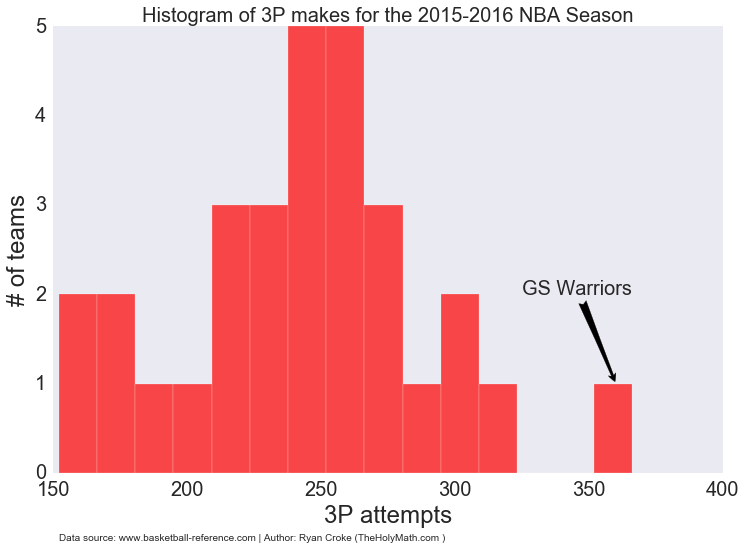

In [171]:
filename = '2015_2016_Team_stats.csv'
df_team = pd.read_csv(filename, na_values=['na'])
for keys in df_team.keys():
    print keys
stats_to_display(df_team['3P'])

hist, bins = np.histogram(df_team['3P'], bins=15)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 8), dpi=300)
plt.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')
plt.xlabel('3P attempts',fontsize=24)
plt.ylabel('# of teams',fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Histogram of 3P makes for the 2015-2016 NBA Season',fontsize=20)
plt.annotate('GS Warriors', xy=(360, 1), xytext=(325, 2),fontsize=20,
            arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
plt.text(min(df_team['3P']),-0.75, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.grid(False)
plt.axis(bgcolor='white')
plt.savefig('Histogram_3P.png', bbox_inches='tight')
plt.show()

Number of elements: 30
Minimum: 748.000000 Maximum: 1018.000000
Mean: 856.966667
Standard Deviation: 68.182834
Variance: 4809.205747
Skew : 0.376105
Kurtosis: -0.461810
Number of Standard Deviations the Max is from mean: 2.361787


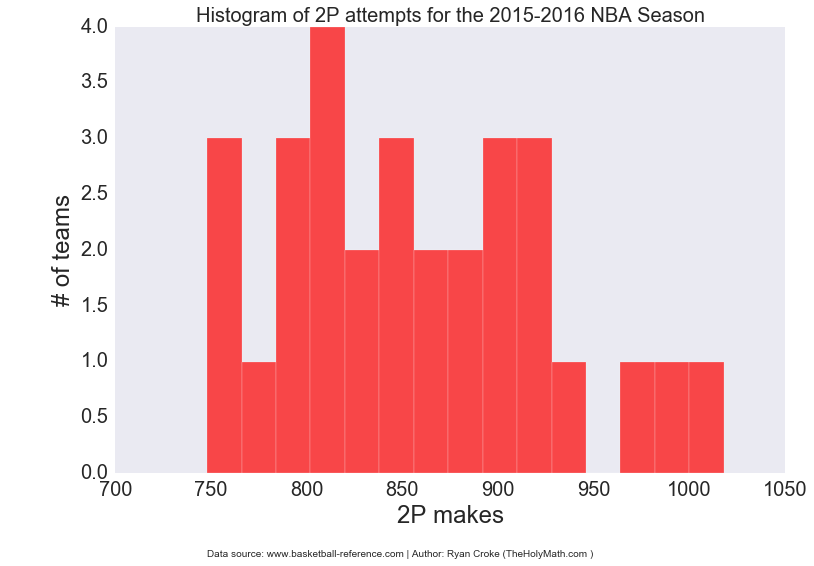

In [31]:
stats_to_display(df_team['2P'])

hist, bins = np.histogram(df_team['2P'], bins=15)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 8), dpi=300)
plt.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')
plt.xlabel('2P makes',fontsize=24)
plt.ylabel('# of teams',fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Histogram of 2P attempts for the 2015-2016 NBA Season',fontsize=20)
plt.annotate('GS Warriors', xy=(360, 1), xytext=(325, 2),fontsize=20,
            arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
plt.text(min(df_team['2P']),-0.75, "Data source: www.basketball-reference.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.grid(False)
plt.axis(bgcolor='white')
plt.savefig('Histogram_2P.png', bbox_inches='tight')
plt.show()

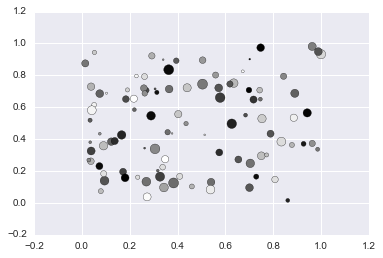

In [172]:
from matplotlib.pyplot import figure, show
import numpy as npy
from numpy.random import rand


if 1: # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)
    def onpick3(event):
        ind = event.ind
        print 'onpick3 scatter:', ind, npy.take(x, ind), npy.take(y, ind)

    fig = figure()
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y, 100*s, c, picker=True)
    fig.savefig('pscoll.png')
    fig.canvas.mpl_connect('pick_event', onpick3)

show()

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)
c_col = np.random.random(size=N)
scatter = ax.scatter(df_team['2P'],
                     df_team['3P'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("2P made vs. 3P made", size=24)
ax.set_xlabel("2P made",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P made", size=16)
ax.text(825,360, "GS Warriors", fontsize=16)
ax.text(701,105, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath.com", fontsize=10)
#ax.annotate('GS Warriors', xy=(360, 850))
#ax.text(200,800,'GS Warriors',ha = 'right', va = 'bottom',size=20)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '2Pv3P.html')

mpld3.display()

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)

scatter = ax.scatter(df_team['2PA'],
                     df_team['3PA'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("2P attempts vs. 3P attempts", size=24)
ax.set_xlabel("2P attempts",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P attempts", size=16)
ax.text(1575,865, "GS Warriors", fontsize=16)
ax.text(1401,405, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath", fontsize=10)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '2PAv3PA.html')

mpld3.display()

In [175]:

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)

scatter = ax.scatter(df_team['3PA'],
                     df_team['3P'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("3P made vs. 3P attempts", size=24)
ax.set_xlabel("3P attempts",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P made", fontweight='bold',size=16)
ax.text(825,360, "GS Warriors", fontsize=16)
ax.text(401,105, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath", fontsize=10)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '3Pv3PA.html')

mpld3.display()

In [178]:

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#FFFFFF'))
N = len(df_team)

scatter = ax.scatter(df_team['2P%'],
                     df_team['3P%'],
                     c=c_col,
                     s=np.ones(N)*1000,
                     alpha=0.3,
                     cmap=plt.cm.jet)
#x.grid(color='grey', linestyle='--')

ax.set_title("2P % vs. 3P %", size=24)
ax.set_xlabel("2P %",size=16)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_ylabel("3P %", fontweight='bold',size=16)
ax.text(0.5,0.41, "GS Warriors", fontsize=16)
#ax.text(401,105, "Data source: www.basketball-reference.com |"  "Author: Ryan Croke TheHolyMath", fontsize=10)

labels = [df_team['Team'][i] for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.save_html(fig, '2PPv3PP.html')

mpld3.display()

# How to embed in website

* mpld3.save_html(fig, 'name.html') - saves as an html
* copy the html source code into a custom field in Wordpress - example: CODE1
* In WYSIWIG use %CODE1% to embed

In [80]:
# Line example
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

N = 50
df = pd.DataFrame(index=range(N))
df['x'] = np.random.randn(N)
df['y'] = np.random.randn(N)
df['z'] = np.random.randn(N)

points = ax.plot(df.x, df.y,'-', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('HTML tooltips', size=20)

labels = []
for i in range(N):
    label = df.ix[[i], :].T
    label.columns = ['Row {0}'.format(i)]
    # .to_html() is unicode; so make leading 'u' go away with str()
    labels.append(str(label.to_html()))

#labels = [i for i in range(N)]

tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

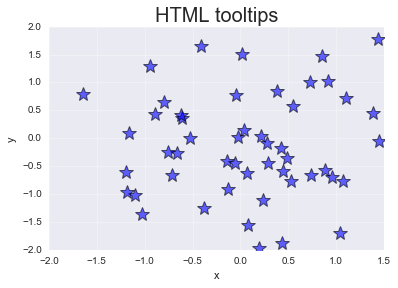

In [83]:

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

N = 50
df = pd.DataFrame(index=range(N))
df['x'] = np.random.randn(N)
df['y'] = np.random.randn(N)
df['z'] = np.random.randn(N)

labels = []
for i in range(N):
    label = df.ix[[i], :].T
    label.columns = ['Row {0}'.format(i)]
    # .to_html() is unicode; so make leading 'u' go away with str()
    labels.append(str(label.to_html()))

points = ax.plot(df.x, df.y, '*', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('HTML tooltips', size=20)

tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10)
mpld3.plugins.connect(fig, tooltip)

#displayHTML(mpld3.fig_to_html(fig))

In [160]:
# https://github.com/jakevdp/mpld3/issues/203
import numpy as np
import matplotlib.pyplot as plt
import mpld3

fig, ax = plt.subplots()
x = range(10)
y = range(10,20)
lines = ax.plot(x,y, marker='o')
ax.text(3,13,'text')
mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(lines[0],labels=y))

mpld3.display()

In [121]:
hist, bins = np.histogram(df.PER, bins=25)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots()
#plt.figure(figsize=(12, 8), dpi=300)
boxes = ax.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')

#plt.savefig('Histogram_PER.png', bbox_inches='tight')
#mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(boxes[0],labels=bins.tolist()))

tooltip = mpld3.plugins.PointHTMLTooltip(boxes[0],labels=bins.tolist(),
                                   voffset=0, hoffset=0)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [111]:
import numpy as np, matplotlib.pyplot as plt, mpld3, seaborn as sns

list = [['0-50',4],['50-100',11],['100-150',73],['150-200',46]]
n_groups = len(list)
index = np.arange(n_groups)

bar_width = 0.9
opacity = 0.4

number = []
ranges = []
for item in list:
    number.append(item[1])
    ranges.append(item[0])

rects1 = plt.bar(index, number, bar_width,
                 alpha=opacity,
                 color='b')

plt.xlabel('Number')
plt.ylabel('range')
plt.xticks(index + bar_width/2, (ranges[0],ranges[1],ranges[2],ranges[3]))

mpld3.display()

In [117]:
print df.PER

0      35.47
1      31.27
2      30.64
3      26.92
4      26.71
5      26.49
6      26.45
7      26.21
8      26.17
9      25.85
10     25.48
11     25.34
12     24.64
13     24.32
14     23.46
15     23.42
16     23.37
17     22.76
18     22.45
19     22.45
20     22.43
21     22.10
22     21.99
23     21.82
24     21.62
25     21.44
26     21.31
27     21.26
28     21.26
29     20.87
       ...  
291     8.43
292     8.20
293     8.17
294     8.02
295     7.80
296     7.65
297     7.58
298     7.37
299     7.30
300     7.26
301     7.24
302     7.16
303     7.08
304     7.03
305     6.64
306     6.25
307     5.99
308     5.97
309     5.95
310     5.75
311     5.75
312     5.68
313     5.28
314     4.99
315     4.98
316     4.94
317     4.81
318     4.07
319     3.91
320    -1.16
Name: PER, dtype: float64


In [109]:
x = range(10)
y = range(10,20)
type(bins.tolist())


list